## Dataset: resultados da megasena - HTML


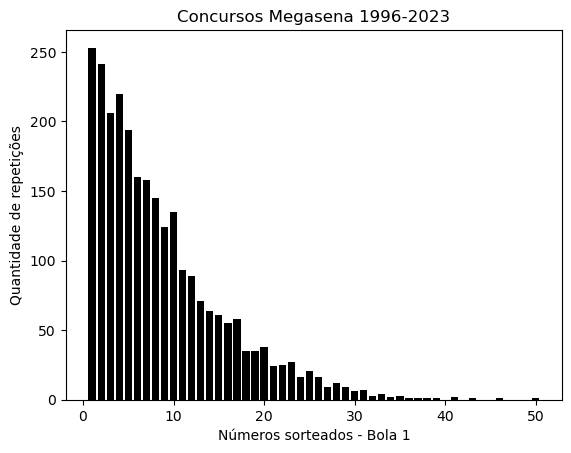

In [52]:
# Josenalde Oliveira Sept 2023
#https://loterias.caixa.gov.br/Paginas/Mega-Sena.aspx
import pandas as pd
from collections import Counter

df_ms = pd.read_excel('../datasets/Mega-Sena.xlsx', na_filter=False)
#quais bolas 1 já sairam
df_ms['Bola1'].unique()
#qual a frequência de bolas 1
Counter(df_ms['Bola1']).most_common()

x = Counter(df_ms['Bola1'])
xs = sorted(x.items(), key = lambda pair: pair[0])
n = []
s = []
for i, j in xs:
    n.append(i)
    s.append(j)

import matplotlib.pyplot as plt
plt.bar(n, s, color='black')
plt.xlabel('Números sorteados - Bola 1')
plt.ylabel('Quantidade de repetições')
plt.title('Concursos Megasena 1996-2023')
plt.show()

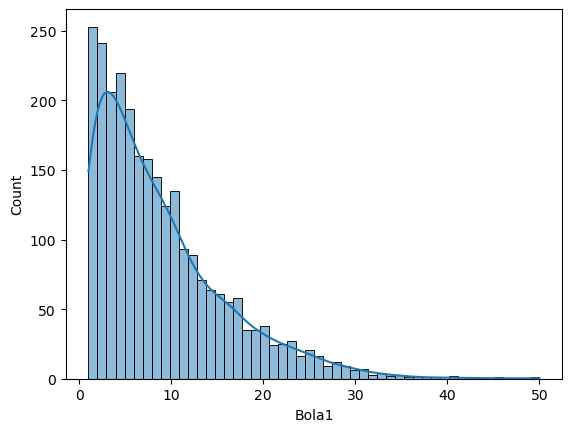

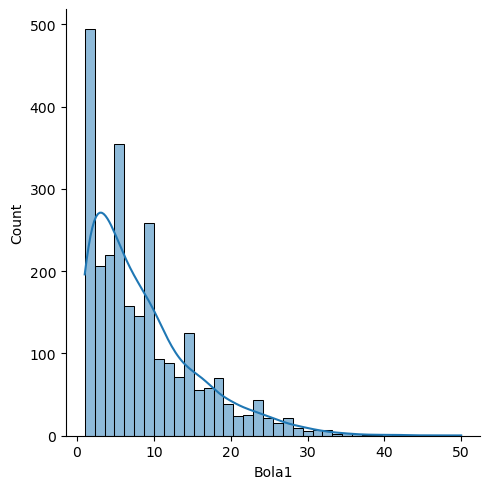

In [62]:
import seaborn as sns
sns.histplot(data=df_ms, x=df_ms['Bola1'], bins=50, kde=True)
sns.displot(data=df_ms, x=df_ms['Bola1'], kde=True)

In [14]:
"""
r, _ = cefexcel.shape
rIdxPares = []
for x in range(1, r, 2):
    rIdxPares.append(x)
#print(rIdxPares)

cefexcel = pd.read_excel('cefexcel.xlsx', na_filter=False, skiprows=rIdxPares)
#cefexcel.head()
# grava a partir do dataframe cefexcel um csv transformado, sem as linhas em branco, o qual pode, por exemplo ser persistido no mongodb
cefexcel.to_csv('cefexceltransform.csv') # para persistir no mongoDB

#rIdxPares
#print(cefexcel.columns)
cefexcel[cefexcel['Local'].str.contains(', RN', regex=False, na=False)]

#pesquisar lista de termos (com OU |)
#terms = ['foo', 'baz']
#df[df['col'].str.contains('|'.join(terms))]

#pesquisar começando com uma string seguido de qualquer coisa (usar regex)
#df[df['col'].str.contains(r'foo(?!$)')]"""


"\nr, _ = cefexcel.shape\nrIdxPares = []\nfor x in range(1, r, 2):\n    rIdxPares.append(x)\n#print(rIdxPares)\n\ncefexcel = pd.read_excel('cefexcel.xlsx', na_filter=False, skiprows=rIdxPares)\n#cefexcel.head()\n# grava a partir do dataframe cefexcel um csv transformado, sem as linhas em branco, o qual pode, por exemplo ser persistido no mongodb\ncefexcel.to_csv('cefexceltransform.csv') # para persistir no mongoDB\n\n#rIdxPares\n#print(cefexcel.columns)\ncefexcel[cefexcel['Local'].str.contains(', RN', regex=False, na=False)]\n\n#pesquisar lista de termos (com OU |)\n#terms = ['foo', 'baz']\n#df[df['col'].str.contains('|'.join(terms))]\n\n#pesquisar começando com uma string seguido de qualquer coisa (usar regex)\n#df[df['col'].str.contains(r'foo(?!$)')]"

In [3]:
import pandas as pd
# Erro na leitura a partir do .csv (original)
#cefcsv = pd.read_csv('https://github.com/boaglio/mongodb-casadocodigo/blob/master/capitulo-03/megasena.csv', error_bad_lines=False)
#cefcsv

Exemplo de necessidade de TRANSFORMAÇÃO NOS DADOS - Copia do HTML para planilha gerando CSV

Usando requests e beautifulsoup para obter dados HTML e fazer parser por TAGS

In [2]:
import requests
from bs4 import BeautifulSoup as soup

url = 'http://loterias.caixa.gov.br/wps/portal/loterias'
html = requests.get(url).text
soupPage = soup(html, 'html5lib') 

# Exibir todo o conteúdo HTML da página obtida com requests
#soup
ul = soupPage.findAll( "ul", class_="resultado-loteria mega-sena" ) #retorna array com a tag UL com a classe informada

# ou, se fosse a primeira tag ul de interesse, pode-se usar agrupado, como
# li = soupPage.find("ul", class_="resultado-loteria mega-sena").findAll("li")

#print(ul[0])
#ul[0].findAll('li')
# Percorre o vetor com as tags LI

for li in ul[0].findAll( "li" ):
    print( li.text )

<ul class="resultado-loteria mega-sena"><li>04</li><li>31</li><li>42</li><li>45</li><li>49</li><li>56</li>
				</ul>
04
31
42
45
49
56


#### EXERCÍCIO 1: Fazer uma função que recebe como parâmetro o número do concurso da megasena e retorna um dict com o número do concurso como chave e as dezenas sorteadas como Array de valores. Exemplo: {2340: [16, 20, 30, 01, 20, 2]}. A URL que deve ser usada é a https://www.loteriaseresultados.com.br/index.php/megasena/concurso/"concurso", onde "concurso" é o número desejado. Persista o valor como um documento no mongodb, no banco concursos, coleção megasena. 

#### EXERCÍCIO 2: e se, além da sena, desejo o resultado da quina e da quadra. O ideal é uma função ampliada que retorne, para cada tipo de prêmio, a quantidade de ganhadores e o valor do prêmio dividido. Antes de desenvolver a função, esboce em sites de formatação JSON como seria este dicionário, o qual será montado dentro de sua função. Aqui, métodos de string como startswith, strip e split serão úteis.

#### EXERCÍCIO 3: acesse o site de notícias da UFRN, percorrendo automaticamente todas as páginas com o filtro EAJ e a) construa a nuvem de palavras com base nas notícias pesquisadas. Ao pesquisar a palavra EAJ em https://ufrn.br/imprensa/noticias/filtros?text=eaj, temos atualmente (13.02.2021) 133 resultados, com vários assuntos relacionados à EAJ. Desejamos ver que termos se destacam nestes anos de publicações (identifique o intervalo da mais antiga para a mais nova no próprio resultado da busca) e uma nuvem de palavras é interessante; b) para cada notícia, guarde o ano de publicação, para uma simples verificação (por gráfico de barras) da quantidade de notícias por ano.


In [3]:
a = {2340: [16, 20, 30, 11, 5, 12]}
type(a)

dict

Proposta de solução a partir de observação do Luan em postagem enviada a mim pelo Discord: a URL informada para os exercícios 1 e 2 da Lista 02 tem seu conteúdo devolvido pelo get do BeautifulSoup com as tags de renderização Javascript, pela forma de construção do frontend da respectiva página, não sendo possível o scraping direto no conteúdo html devolvido. Uma solução é utilizar libs como a Selenium: https://pypi.org/project/selenium/, que se integra à classe webdriver com o navegador (no caso uso Chrome aqui) em modo 'headless', sem renderização gráfica do DOM. Pode-se então usar o conteúdo do body como parâmetro para o BeautifulSoup ou usar diretamente as funções de localização do Selenium.

Passo a passo para preparação do ambiente:

1) baixar o chromedriver (ver a versão do Chrome instalado digitando chrome://settings/help na URL):
   https://sites.google.com/a/chromium.org/chromedriver/downloads. O webdriver, no contexto de raspagem de dados web, é usado para se conectar ao browser, permitindo a renderização da página alvo (HTML) bem como o envio de comandos do script para o navegador.
   
2) adicionar a pasta do executável chromedriver à variável de ambiente PATH (ambiente do usuário e do sistema, por segurança)

3) instalar lib selenium (pip install selenium)
https://pypi.org/project/selenium/ 

No exemplo abaixo, é mostrado que com BSoup padrão não há retorno de spanList, mas com o Selenium + Webdriver, funciona normamente.

In [14]:
import requests
from bs4 import BeautifulSoup as soup

url = 'https://www.loteriaseresultados.com.br/index.php/megasena/concurso/2340'
html = requests.get(url).text
soupPage = soup(html, 'html5lib')
#print(soupPage)
spanList = soupPage.findAll( "span",  class_="white--text font-weight-bold")
print(spanList) # Não encontra a tag, pois traz o Javascript renderizado e não o HTML completo da página
# Solução - utilizar lib como Selenium para ter acesso ao HTML full - sem a parte gráfica renderizada pelo browser

#-------------------- até aqui foi para demonstrar que não retorna pelo método padrão ------------- #
#!pip install -U selenium

from selenium import webdriver

# --- caso não funcione com o procedimento mais simples --- 
#!pip install webdriver-manager
#from webdriver_manager.chrome import ChromeDriverManager
#driver = webdriver.Chrome(ChromeDriverManager().install())

options = webdriver.ChromeOptions()
options.add_argument('headless') # O mais importante, não renderiza parte gráfica
options.add_argument('window-size=1920x1080')
# outras opções:
""" disable-gpu
    ignore-certificate-errors
    disable-extensions
    etc.
"""
# altere aqui para o seu PATH incluindo o .exe
driver = webdriver.Chrome(executable_path = r'C:/Users/josen/chromedriver/chromedriver.exe', options = options)

""" o método get() abre a URL e aguarda até todo o conteúdo estar carregado. O WebDriver 
    aguardará toda a página estar carregada até retornar o controle para o script """

driver.get(url)
# verifica se abriu ok
print(driver.current_url)

""" comandos selenium de busca (retornam WebElements ou Exceção noSuchElementException):
    URL: https://selenium-python.readthedocs.io/locating-elements.html#locating-elements
    find_element_by_class_name(className)
    find_element_by_id
    find_element_by_css_selector
    find_element_by_link_text (por texto de href)
    find_element_by_partial_link_text (por pedaço de texto de href)
    find_element_by_tag_name
    find_element_by_xpath
    
    Este comando retorna a primeira ocorrência. Para encontrar todas, as funções acima possuem a versão que retorna lista
    trocando _element por _elements (find_elements_by_id) etc.
    
"""
    
#try:
    
    # uma opção é obter todo o body (ou parte mais específica) da página com o selenium/webdriver e passar ao BSoup para análise padrão
body = driver.find_element_by_tag_name('body')
html = body.get_attribute('innerHTML')
soupPage = soup(html, 'html5lib')
spanList = soupPage.findAll( "span", class_='white--text font-weight-bold')
print(len(spanList))
for n in range(6):
    print(spanList[n].text)
    
    
print('-------- segundo método ---------')
    
# No caso de classe ou id com espaço, a sintaxe abaixo é a indicada, colocar simplesmente o nome da classe não reconhece
    
content = driver.find_elements_by_css_selector("span[class='white--text font-weight-bold']")
    
# Será retornada uma lista com os elementos, portanto, podemos percorrer. Ao olhar a URl, vemos 09 elementos com esta
# classe, e só estamos interessados nos 06 primeiros. Então, faremos um laço:
    
for n in range(6):
    print(content[n].get_attribute('innerHTML'))

#except:
#    print('criterio nao encontrado')
    
print('Terminei a raspagem de dados')
driver.close()



[]
https://www.loteriaseresultados.com.br/index.php/megasena/concurso/2340
6
16
21
28
41
49
51
-------- segundo método ---------
16
21
28
41
49
51
Terminei a raspagem de dados
